In [ ]:
import numpy as np
 
def cluster_points(X, mu):
    clusters  = {}
    for x in X:
        bestmukey = min([(i[0], np.linalg.norm(x-mu[i[0]])) \
                    for i in enumerate(mu)], key=lambda t:t[1])[0]
        try:
            clusters[bestmukey].append(x)
        except KeyError:
            clusters[bestmukey] = [x]
    return clusters
 
def reevaluate_centers(mu, clusters):
    newmu = []
    keys = sorted(clusters.keys())
    for k in keys:
        newmu.append(np.mean(clusters[k], axis = 0))
    return newmu
 
def has_converged(mu, oldmu):
    return (set([tuple(a) for a in mu]) == set([tuple(a) for a in oldmu])
 
def find_centers(X, K):
    # Initialize to K random centers
    oldmu = random.sample(X, K)
    mu = random.sample(X, K)
    while not has_converged(mu, oldmu):
        oldmu = mu
        # Assign all points in X to clusters
        clusters = cluster_points(X, mu)
        # Reevaluate centers
        mu = reevaluate_centers(oldmu, clusters)
    return(mu, clusters)

In [13]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt

class KMeans():
    def __init__(self, K, X=None, N=0):
        self.K = K
        if X == None:
            if N == 0:
                raise Exception("If no data is provided, \
                                 a parameter N (number of points) is needed")
            else:
                self.N = N
                self.X = self._init_board_gauss(N, K)
        else:
            self.X = X
            self.N = len(X)
        self.mu = None
        self.clusters = None
        self.method = None
 
    def _init_board_gauss(self, N, k):
        n = float(N)/k
        X = []
        for i in range(k):
            c = (random.uniform(-1,1), random.uniform(-1,1))
            s = random.uniform(0.05,0.15)
            x = []
            while len(x) < n:
                a,b = np.array([np.random.normal(c[0],s),np.random.normal(c[1],s)])
                # Continue drawing points from the distribution in the range [-1,1]
                if abs(a) and abs(b)<1:
                    x.append([a,b])
            X.extend(x)
        X = np.array(X)[:N]
        return X
 
    def plot_board(self):
        X = self.X
        fig = plt.figure(figsize=(5,5))
        plt.xlim(-1,1)
        plt.ylim(-1,1)
        if self.mu and self.clusters:
            mu = self.mu
            clus = self.clusters
            K = self.K
            for m, clu in clus.items():
                cs = cm.spectral(1.*m/self.K)
                plt.plot(mu[m][0], mu[m][1], 'o', marker='*', \
                         markersize=12, color=cs)
                plt.plot(zip(*clus[m])[0], zip(*clus[m])[1], '.', \
                         markersize=8, color=cs, alpha=0.5)
        else:
            plt.plot(zip(*X)[0], zip(*X)[1], '.', alpha=0.5)
        if self.method == '++':
            tit = 'K-means++'
        else:
            tit = 'K-means with random initialization'
        pars = 'N=%s, K=%s' % (str(self.N), str(self.K))
        plt.title('\n'.join([pars, tit]), fontsize=16)
        plt.savefig('kpp_N%s_K%s.png' % (str(self.N), str(self.K)), \
                    bbox_inches='tight', dpi=200)
 
    def _cluster_points(self):
        mu = self.mu
        clusters  = {}
        for x in self.X:
            bestmukey = min([(i[0], np.linalg.norm(x-mu[i[0]])) \
                             for i in enumerate(mu)], key=lambda t:t[1])[0]
            try:
                clusters[bestmukey].append(x)
            except KeyError:
                clusters[bestmukey] = [x]
        self.clusters = clusters
 
    def _reevaluate_centers(self):
        clusters = self.clusters
        newmu = []
        keys = sorted(self.clusters.keys())
        for k in keys:
            newmu.append(np.mean(clusters[k], axis = 0))
        self.mu = newmu
 
    def _has_converged(self):
        K = len(self.oldmu)
        return(set([tuple(a) for a in self.mu]) == \
               set([tuple(a) for a in self.oldmu])\
               and len(set([tuple(a) for a in self.mu])) == K)
 
    def find_centers(self, method='random'):
        self.method = method
        X = self.X
        K = self.K
        self.oldmu = random.sample(X, K)
        if method != '++':
            # Initialize to K random centers
            self.mu = random.sample(X, K)
        while not self._has_converged():
            self.oldmu = self.mu
            # Assign all points in X to clusters
            self._cluster_points()
            # Reevaluate centers
            self._reevaluate_centers()

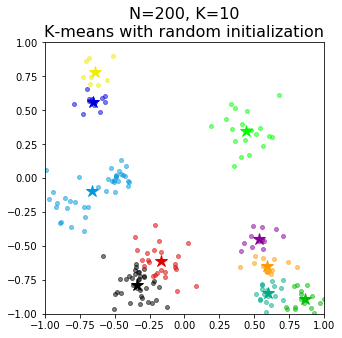

In [16]:
kmeans = KMeans(10, N=200)
kmeans.find_centers()
kmeans.plot_board()

In [18]:
class KPlusPlus(KMeans):
    def _dist_from_centers(self):
        cent = self.mu
        X = self.X
        D2 = np.array([min([np.linalg.norm(x-c)**2 for c in cent]) for x in X])
        self.D2 = D2
 
    def _choose_next_center(self):
        self.probs = self.D2/self.D2.sum()
        self.cumprobs = self.probs.cumsum()
        r = random.random()
        ind = np.where(self.cumprobs >= r)[0][0]
        return(self.X[ind])
 
    def init_centers(self):
        self.mu = random.sample(self.X, 1)
        while len(self.mu) < self.K:
            self._dist_from_centers()
            self.mu.append(self._choose_next_center())
 
    def plot_init_centers(self):
        X = self.X
        fig = plt.figure(figsize=(5,5))
        plt.xlim(-1,1)
        plt.ylim(-1,1)
        plt.plot(zip(*X)[0], zip(*X)[1], '.', alpha=0.5)
        plt.plot(zip(*self.mu)[0], zip(*self.mu)[1], 'ro')
        plt.savefig('kpp_init_N%s_K%s.png' % (str(self.N),str(self.K)), \
                    bbox_inches='tight', dpi=200)

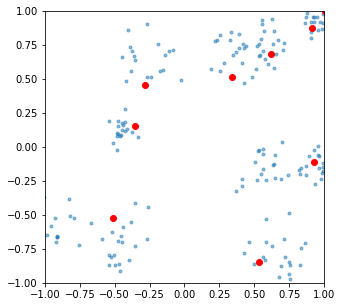

In [23]:
kplusplus = KPlusPlus(10, N=200)
kplusplus.init_centers()
kplusplus.plot_init_centers()